In [1]:
import pandas as pd
import pathlib as plb
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure as fg

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
data_loc = plb.Path('/Users/emilyfryer/Documents/Current_analysis/automated_results/Fall_results')

In [18]:
plate_dat = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/ImageData_Fall20.csv')

In [19]:
plate_dat.rename(columns={
                       "Image file name:": 'filename',
                       'Is this the pre or post assay image?': 'pre_fin',
                      'Plate number in slot 1:': '1',
                       'Plate number in slot 2:': '2',
                       'Plate number in slot 3:': '3',
                       'Plate number in slot 4:': '4',}, inplace=True)

In [20]:
plate_dat.head()

,Timestamp,Scanner Number:,filename,1,2,3,4
0,10/29/2020 16:52:03,3,NPP_201102_01_pre.tif,NPP_201102_001,NPP_201102_002,NPP_201102_003,NPP_201102_004
1,10/29/2020 16:59:16,4,NPP_201030_01_pre.tif,NPP_201030_001,NPP_201030_002,NPP_201030_003,NPP_201030_004
2,10/29/2020 17:00:22,3,NPP_201102_01_pre.tiff,NPP_201102_005,NPP_201102_006,NPP_201102_007,NPP_201102_008
3,10/29/2020 17:01:35,3,NPP_201102_03_pre.tiff,NPP_201102_009,NPP_201102_010,NaN,NaN
4,10/29/2020 17:06:43,4,NPP_201030_02_pre.tif,NPP_201030_005,NPP_201030_006,NPP_201030_007,NPP_201030_008


In [21]:
plate_prefix = ['NPP_201030', 'NPP_201102', 'NPP_201106']
well_list = ['A', 'B', 'C','D']

In [22]:
new_list = []
for prefix in plate_prefix:
    for well in well_list:
        for i in range(1,21):
            if i <10:
                new_prefix = prefix + '_' + str('00') + str(i) + well
            if i >= 10:
                new_prefix = prefix +  '_' + str('0') + str(i) + well
            new_list.append(new_prefix)

In [23]:
new_list

['NPP_201030_001A',
 'NPP_201030_002A',
 'NPP_201030_003A',
 'NPP_201030_004A',
 'NPP_201030_005A',
 'NPP_201030_006A',
 'NPP_201030_007A',
 'NPP_201030_008A',
 'NPP_201030_009A',
 'NPP_201030_010A',
 'NPP_201030_011A',
 'NPP_201030_012A',
 'NPP_201030_013A',
 'NPP_201030_014A',
 'NPP_201030_015A',
 'NPP_201030_016A',
 'NPP_201030_017A',
 'NPP_201030_018A',
 'NPP_201030_019A',
 'NPP_201030_020A',
 'NPP_201030_001B',
 'NPP_201030_002B',
 'NPP_201030_003B',
 'NPP_201030_004B',
 'NPP_201030_005B',
 'NPP_201030_006B',
 'NPP_201030_007B',
 'NPP_201030_008B',
 'NPP_201030_009B',
 'NPP_201030_010B',
 'NPP_201030_011B',
 'NPP_201030_012B',
 'NPP_201030_013B',
 'NPP_201030_014B',
 'NPP_201030_015B',
 'NPP_201030_016B',
 'NPP_201030_017B',
 'NPP_201030_018B',
 'NPP_201030_019B',
 'NPP_201030_020B',
 'NPP_201030_001C',
 'NPP_201030_002C',
 'NPP_201030_003C',
 'NPP_201030_004C',
 'NPP_201030_005C',
 'NPP_201030_006C',
 'NPP_201030_007C',
 'NPP_201030_008C',
 'NPP_201030_009C',
 'NPP_201030_010C',


In [24]:
df = pd.DataFrame({'Plate_well_id':new_list})
df.head()

,Plate_well_id
0,NPP_201030_001A
1,NPP_201030_002A
2,NPP_201030_003A
3,NPP_201030_004A
4,NPP_201030_005A


In [50]:
#df.to_csv('/Users/emilyfryer/Documents/Current_analysis/Well_ids.csv', index=False)

In [25]:
blind = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/Well_ids.csv')
blind['Compound'] = ''

In [26]:
compounds = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/compound_ids.csv')
compounds.head()

,Compound,ID,Solvent,Notes,Published CI,Unnamed: 5,Unnamed: 6
0,Isobutanol/2-Methyl-1-propanol,1,H2O,NaN,+,NaN,NaN
1,Thujole (alpha beta mix),2,H2O,NaN,NaN,NaN,NaN
2,Spermadine,3,H2O,NaN,NaN,NaN,NaN
3,Cadaverine,4,EtOH,NaN,NaN,NaN,NaN
4,2-Undecanone,5,DMSO,NaN,-,Analog,2-nonanone


In [27]:
def add_compound(row, compound_metadata):
    compound = compound_metadata.loc[
        compound_metadata['ID']==row['Compound_ID']]['Compound']
    return compound.values[0]

In [28]:
blind['Compound'] = blind.apply(
    lambda row: add_compound(row, compounds), axis=1)
blind.head()

,Plate_well_id,Unnamed: 1,Compound_ID,Compound
0,NPP_201030_001A,NaN,1,Isobutanol/2-Methyl-1-propanol
1,NPP_201030_002A,NaN,13,2-butanone
2,NPP_201030_003A,NaN,25,SINOMENINE
3,NPP_201030_004A,NaN,37,alpha-terpineol
4,NPP_201030_005A,NaN,8,Octyl acetate


In [29]:
def add_solvent(row, compound_metadata):
    compound = compound_metadata.loc[
        compound_metadata['ID']==row['Compound_ID']]['Solvent']
    return compound.values[0]

In [30]:
blind['Solvent'] = blind.apply(
    lambda row: add_solvent(row, compounds), axis=1)
blind.head()

,Plate_well_id,Unnamed: 1,Compound_ID,Compound,Solvent
0,NPP_201030_001A,NaN,1,Isobutanol/2-Methyl-1-propanol,H2O
1,NPP_201030_002A,NaN,13,2-butanone,EtOH
2,NPP_201030_003A,NaN,25,SINOMENINE,H2O
3,NPP_201030_004A,NaN,37,alpha-terpineol,DMSO
4,NPP_201030_005A,NaN,8,Octyl acetate,EtOH


In [295]:

#blind.to_csv('/Users/emilyfryer/Documents/Current_analysis/unblind.csv'

In [70]:
new_df = pd.DataFrame()
for data in data_loc.glob('*.csv'):
    image_id = data.stem + '_fin.tif'
    hold = pd.read_csv(data)
    hold['Image ID']=image_id
    hold['Slot'] = hold['WellNo'].astype(str).str[0]
    hold['Well'] = hold['WellNo'].astype(str).str[1]
    new_df= pd.concat([new_df,hold])

In [71]:
new_df.reset_index(drop=True, inplace=True)
#new_df.to_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/image_dat.csv')
#new_df = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/image_dat.csv')
new_df.head()

,Unnamed: 0,index,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,Image ID,Slot,Well
0,0,12,1A,1449,7631,1000,6115,1895,9163,2339634,162.0,-0.013889,NaN,NaN,NPP_201106_01_fin.tif,1,A
1,1,125,1B,2946,7632,2503,6113,3397,9154,2320422,152.0,-0.114504,NaN,NaN,NPP_201106_01_fin.tif,1,B
2,2,209,1C,4399,7636,3952,6110,4853,9170,2354900,143.0,-0.383333,NaN,NaN,NPP_201106_01_fin.tif,1,C
3,3,312,1D,5823,7626,5377,6106,6277,9161,2346795,177.0,-0.047619,NaN,NaN,NPP_201106_01_fin.tif,1,D
4,4,7,2A,1432,2598,985,1058,1882,4149,2392425,141.0,0.450000,NaN,NaN,NPP_201106_01_fin.tif,2,A


In [72]:
for index, row in new_df.iterrows():
    slot = row['Slot']
    f_id = row['Image ID']
    pid = plate_dat.loc[f_id==plate_dat['filename']][slot]
    pid2= pid.reset_index(drop=True).to_frame()


In [73]:
def add_pid(row, image_metdat):
    slot = row['Slot']
    pid = image_metdat.loc[row['Image ID']==image_metdat['filename']][slot]
    wid = pid.values[0] + row['Well']
    return wid
    

In [74]:
new_df['pid']=new_df.apply(
    lambda row: add_pid(row, plate_dat), axis=1)


In [75]:
new_df.tail()

,Unnamed: 0,index,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,Image ID,Slot,Well,pid
235,11,604,3D,12542,2847,12105,1319,12986,4377,2347977,135.0,0.186992,NaN,NaN,NPP_201102_02_fin.tif,3,D,NPP_201102_007D
236,12,419,4A,8118,7288,7680,5773,8563,8822,2284054,158.0,-0.109589,NaN,NaN,NPP_201102_02_fin.tif,4,A,NPP_201102_008A
237,13,488,4B,9597,7299,9149,5778,10041,8830,2294965,175.0,0.038961,NaN,NaN,NPP_201102_02_fin.tif,4,B,NPP_201102_008B
238,14,557,4C,11042,7318,10593,5818,11491,8848,2311115,181.0,-0.111111,NaN,NaN,NPP_201102_02_fin.tif,4,C,NPP_201102_008C
239,15,602,4D,12529,7338,12083,5842,12981,8864,2302068,105.0,0.161290,NaN,NaN,NPP_201102_02_fin.tif,4,D,NPP_201102_008D


In [302]:
#new_df.to_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/thissucks.csv')

In [76]:
def metdat2realdat(row, compound_metadata):
    cmpnd = compound_metadata.loc[compound_metadata['Plate_well_id']==row['pid']]['Compound']
    return cmpnd.values[0]

In [77]:
new_df['Compound']=new_df.apply(
    lambda row: metdat2realdat(row, blind), axis=1)


In [78]:
def solvdat2realdat(row, compound_metadata):
    solvent = compound_metadata.loc[compound_metadata['Plate_well_id']==row['pid']]['Solvent']
    return solvent.values[0]

In [79]:
new_df['Solvent']=new_df.apply(
    lambda row: solvdat2realdat(row, blind), axis=1)

In [80]:
new_df.to_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/Fall20_results.csv')
#new_df = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/Fall20_results.csv')

In [81]:
new_df

,Unnamed: 0,index,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,Image ID,Slot,Well,pid,Solvent
0,0,12,1A,1449,7631,1000,6115,1895,9163,2339634,162.0,-0.013889,Cadaverine,NaN,NPP_201106_01_fin.tif,1,A,NPP_201106_001A,EtOH
1,1,125,1B,2946,7632,2503,6113,3397,9154,2320422,152.0,-0.114504,Octyl acetate,NaN,NPP_201106_01_fin.tif,1,B,NPP_201106_001B,EtOH
2,2,209,1C,4399,7636,3952,6110,4853,9170,2354900,143.0,-0.383333,(S)-(+)-Carvone,NaN,NPP_201106_01_fin.tif,1,C,NPP_201106_001C,EtOH
3,3,312,1D,5823,7626,5377,6106,6277,9161,2346795,177.0,-0.047619,Lemongrass,NaN,NPP_201106_01_fin.tif,1,D,NPP_201106_001D,DMSO
4,4,7,2A,1432,2598,985,1058,1882,4149,2392425,141.0,0.450000,Isoamyl alcohol*,NaN,NPP_201106_01_fin.tif,2,A,NPP_201106_002A,EtOH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,11,604,3D,12542,2847,12105,1319,12986,4377,2347977,135.0,0.186992,Peoniflorin,NaN,NPP_201102_02_fin.tif,3,D,NPP_201102_007D,EtOH
236,12,419,4A,8118,7288,7680,5773,8563,8822,2284054,158.0,-0.109589,"trans-Caffeic acid/3,4-Dihydroxycinnamic acid",NaN,NPP_201102_02_fin.tif,4,A,NPP_201102_008A,EtOH
237,13,488,4B,9597,7299,9149,5778,10041,8830,2294965,175.0,0.038961,Limonin,NaN,NPP_201102_02_fin.tif,4,B,NPP_201102_008B,DMSO
238,14,557,4C,11042,7318,10593,5818,11491,8848,2311115,181.0,-0.111111,Piperine,NaN,NPP_201102_02_fin.tif,4,C,NPP_201102_008C,EtOH


In [57]:
#test = new_df.groupby('Compound')['Chemotaxis'].mean().reset_index()
#test.to_csv('/Users/emilyfryer/Documents/Current_analysis/metadata/alldat.csv')

In [94]:
published = ['DMSO','EtOH (control)','H2O(controll)','Diacetyl','Isoamyl alcohol*','2-Methyl-1-butanol', 
'Isobutanol/2-Methyl-1-propanol','2-butanone','2-Nonanol','2-Undecanone','1-octanol','(S)-(-)-Carvone','(S)-(+)-Carvone','(±)-Camphor','p-Anisaldehyde',
'Eugenol', 'Piperine','Curcumin','Galantamine','Estragole','alpha-terpineol','Thujole (alpha beta mix)', 'trans-anethole','GENTISIC ACID',
'CITRULLINE','SINOMENINE','L-Mimosine','Peoniflorin','trans-Caffeic acid/3,4-Dihydroxycinnamic acid','Limonin', '4-methylbenzaldehyde/TOLUALDEHYDE','Octyl acetate','Spermadine','Cadaverine','Skatole (3-methylindole)','Agmatine','Frankinscence','Lemongrass','Ylang ylang','Bergamont']


In [12]:
Pain Grant
GENTISIC ACID
CITRULLINE
SINOMENINE
(¬±)-Camphor
L-Mimosine
Peoniflorin
trans-Caffeic acid/3,4-Dihydroxycinnamic acid
Limonin


Previous Screen:
Piperine
Curcumin
Estragole
alpha-terpineol
Thujole (alpha beta mix)
Curcumin
trans-anethole
Euganol

Essential Oils:
Frankinscence
Lemongrass
Ylang ylang
Bergamont

Bacterial Shit
Spermadine
Cadaverine
Skatole (3-methylindole)
Agmatine

Other
4-methylbenzaldehyde/TOLUALDEHYDE
Octyl acetate

SyntaxError: invalid syntax (<ipython-input-12-e5c57365ac46>, line 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

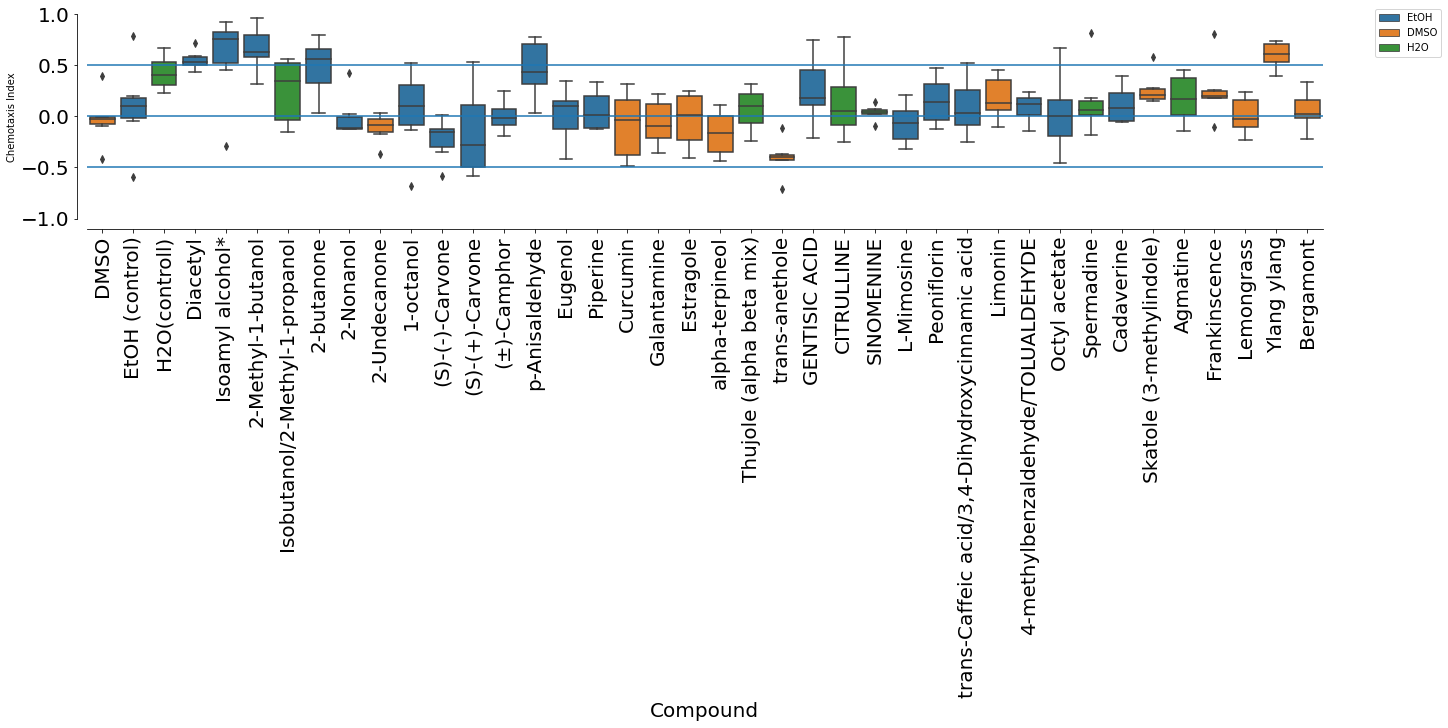

In [95]:

fig, ax = plt.subplots(figsize=(20, 10), constrained_layout=True)
sns.boxplot(x='Compound', y='Chemotaxis', ax=ax,
              data=new_df, order=published, hue='Solvent', dodge=False)
ax.set_xlabel('Compound', fontsize=20)
ax.set_ylabel('Chemotaxis Index')
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylim((-1, 1))
ax.tick_params(labelsize=20)
ax.axhline(.5)
ax.axhline(-.5)
ax.axhline(0)
sns.despine(offset=10)
plt.xticks(rotation=90)

In [96]:
fig.savefig('/Users/emilyfryer/Documents/Current_analysis/Fall20_fig_solvs.pdf')

NameError: name 'df_f' is not defined